# Install and Load Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# Internet Service Provider Customer Churn

## Overview

Internet Service Provider Customer Churn dataset contain basic information for internet service subscriber. The goal is to find a subscriber will churn or not.

-------
**Columns:**
* **id** : unique subscriber id
* **is_tv_subscriber** : Indicates whether the customer has a  tv subscription.
* **is_movie_package_subscriber** : Indicates whether the customer has a  movie package subscription.
* **subscription_age** : how many year has the customer use our service
* **bill_avg** : average bill amount for the last 3 months
* **reamining_contract** : Number of years remaining on the customer's contract. If null, the customer does not have a contract. The customer who has a contract time have to use their service until contract end. If they canceled their service before contract time end they pay a penalty fare.
* **service_failure_count** : Number of times the customer contacted the call center for service failures for the last 3 months
* **download_avg** : internet usage (in GB) for the last 3 months
* **upload_avg** : average upload data (in GB) for the last 3 months
* **download_over_limit** : each customer have a download limit and they must pay extra if they exceed this limit
* **churn** : Indicate whether or not the customer has canceled their service (1 for customers who have canceled).

## Understanding the dataset

### Dataset Information

In [ ]:
df=pd.read_csv('/content/internet_service_churn.csv')

In [ ]:
#display the top row
df.head()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,NaN,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,NaN,1,0.0,0.0,0,1
4,34,0,0,6.39,0,NaN,0,0.0,0.0,0,1


In [ ]:
#display the last row
df.tail()

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1
72273,1689744,1,1,0.01,0,0.82,0,0.0,0.0,0,1


In [ ]:
#get the size of the dataset
df.shape

(72274, 11)

the dataset has 72.274 rows and 11 columns

In [ ]:
#get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   reamining_contract           50702 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 71893 non-null  float64
 8   upload_avg                   71893 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


the dataset contains 11 columns, with 4 columns of float type and 7 columns of integer type

### Descriptive Statistic

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,72274.0,846318.243462,489102.168744,15.00,422216.50,847784.00,1269562.00,1689744.00
is_tv_subscriber,72274.0,0.815259,0.388090,0.00,1.00,1.00,1.00,1.00
is_movie_package_subscriber,72274.0,0.334629,0.471864,0.00,0.00,0.00,1.00,1.00
subscription_age,72274.0,2.450051,2.034990,-0.02,0.93,1.98,3.30,12.80
bill_avg,72274.0,18.942483,13.215386,0.00,13.00,19.00,22.00,406.00
reamining_contract,50702.0,0.716039,0.697102,0.00,0.00,0.57,1.31,2.92
service_failure_count,72274.0,0.274234,0.816621,0.00,0.00,0.00,0.00,19.00
download_avg,71893.0,43.689911,63.405963,0.00,6.70,27.80,60.50,4415.20
upload_avg,71893.0,4.192076,9.818896,0.00,0.50,2.10,4.80,453.30
download_over_limit,72274.0,0.207613,0.997123,0.00,0.00,0.00,0.00,7.00


### Check Unique Value

In [ ]:
#count unique value in each column
df.nunique()

,0
id,72274
is_tv_subscriber,2
is_movie_package_subscriber,2
subscription_age,1110
bill_avg,179
reamining_contract,247
service_failure_count,19
download_avg,2856
upload_avg,802
download_over_limit,8


## Data Preprocessing

### Check Missing Value

In [ ]:
df.isnull().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,21572
service_failure_count,0
download_avg,381
upload_avg,381
download_over_limit,0


In [ ]:
df.isnull().sum()/len(df)*100

,0
id,0.000000
is_tv_subscriber,0.000000
is_movie_package_subscriber,0.000000
subscription_age,0.000000
bill_avg,0.000000
reamining_contract,29.847525
service_failure_count,0.000000
download_avg,0.527161
upload_avg,0.527161
download_over_limit,0.000000


there are missing values ​​in the reamining_contract column total of 21,572 rows or around 29,8%, in the download_avg and upload_avg columns total of 381 rows or around 0,52%. The missing values must be handled with the right method

#### Handled Missing Value

In [ ]:
#change the missing value for remaining_contract column
#the blank values means the customers doesn't have a contract
#so the blank values can be filled with 0

df['reamining_contract'].fillna(0, inplace=True)

In [ ]:
#change the missing value for download_avg column and upload_avg
#fill the blank with median value
df['download_avg'].fillna(df['download_avg'].median(), inplace=True)

df['upload_avg'].fillna(df['upload_avg'].median(), inplace=True)

In [ ]:
df.isnull().sum()

,0
id,0
is_tv_subscriber,0
is_movie_package_subscriber,0
subscription_age,0
bill_avg,0
reamining_contract,0
service_failure_count,0
download_avg,0
upload_avg,0
download_over_limit,0


This data has been cleaned of missing values.

### Check Duplicate Data

In [ ]:
#to know if there is duplicated data
print("total duplicated values: ", df.duplicated().sum())

total duplicated values:  0


there is no duplicated values in this dataset

### Check Outlier

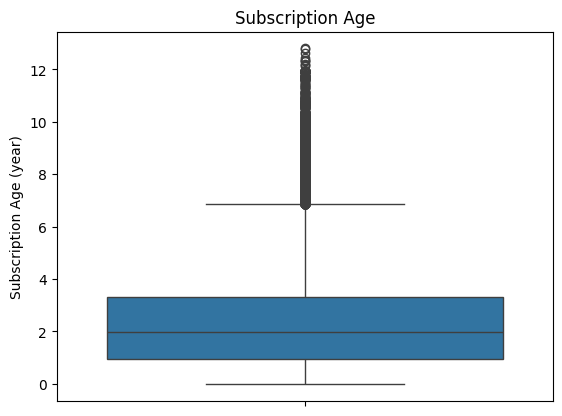

In [ ]:
sns.boxplot(df['subscription_age'])
plt.title('Subscription Age')
plt.ylabel('Subscription Age (year)')
plt.show()

There are outliers in subscription age but that is normal because each customer's subscription preferences are different.

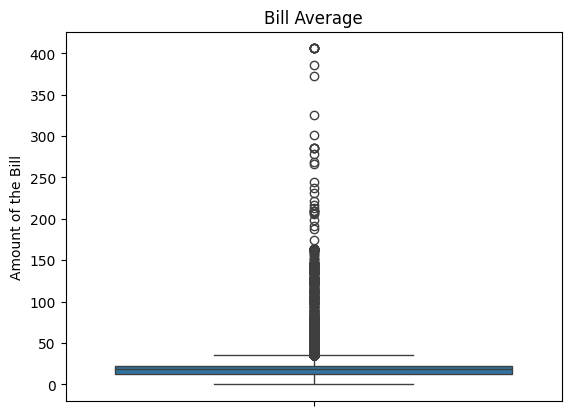

In [ ]:
sns.boxplot(df['bill_avg'])
plt.title('Bill Average')
plt.ylabel('Amount of the Bill')
plt.show()

There are outliers in the average bill but that is normal as billing costs depend on the amount of data used.

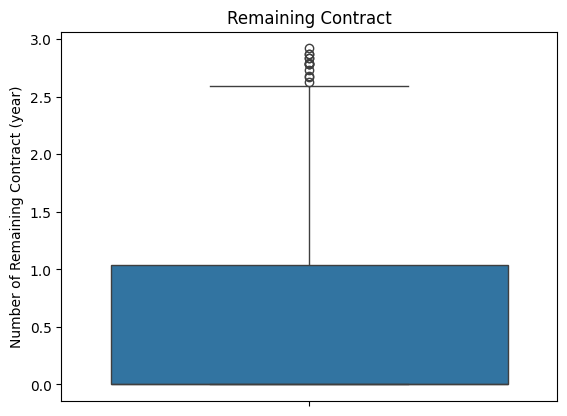

In [ ]:
sns.boxplot(df['reamining_contract'])
plt.title('Remaining Contract')
plt.ylabel('Number of Remaining Contract (year)')
plt.show()

there are outlier in remaining contract

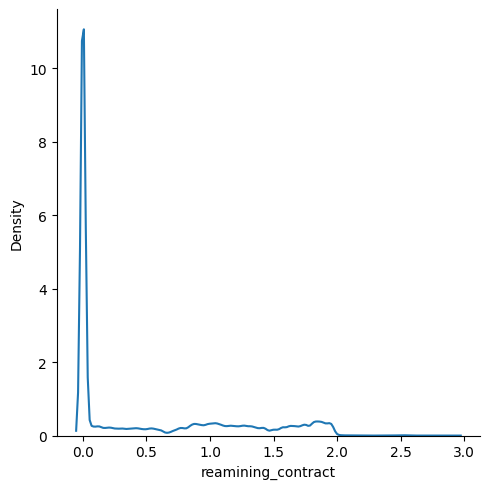

In [ ]:
sns.displot(data=df, x='reamining_contract', kind="kde", bw_adjust=.25)

distplot shows that reamining_contract is not normally distributed but is positively skewed

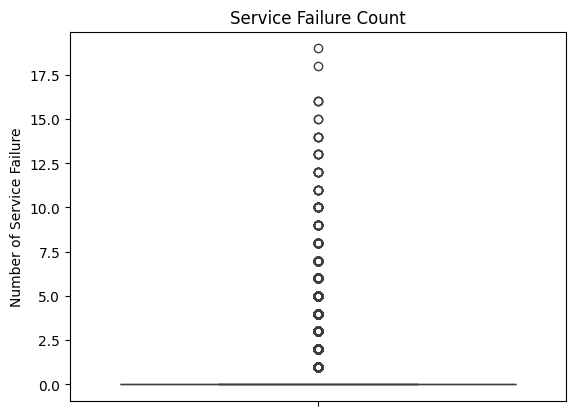

In [ ]:
sns.boxplot(df['service_failure_count'])
plt.title('Service Failure Count')
plt.ylabel('Number of Service Failure')
plt.show()

There are outliers in the number of service failures but that is normal as the challenges faced by each customer are different.

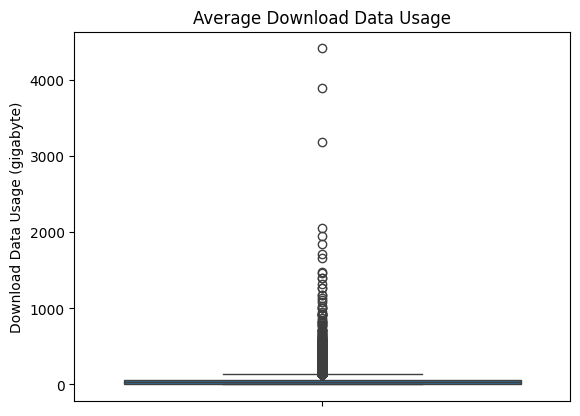

In [ ]:
sns.boxplot(df['download_avg'])
plt.title('Average Download Data Usage')
plt.ylabel('Download Data Usage (gigabyte)')
plt.show()

There are outliers in the average download data usage, but this is normal as the amount of data downloaded by each customer varies.

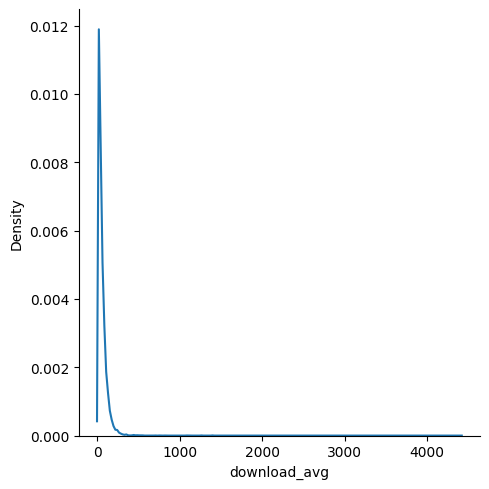

In [ ]:
sns.displot(data=df, x='download_avg', kind="kde", bw_adjust=.25)

distplot shows that download_avg is not normally distributed but is positively skewed

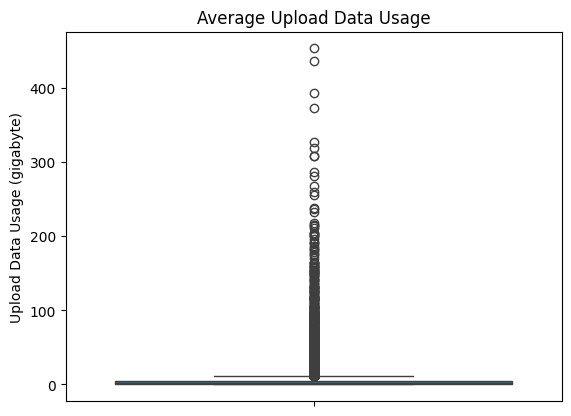

In [ ]:
sns.boxplot(df['upload_avg'])
plt.title('Average Upload Data Usage')
plt.ylabel('Upload Data Usage (gigabyte)')
plt.show()

There are outliers in the average upload data usage, but this is normal as the amount of data uploaded by each customer varies.

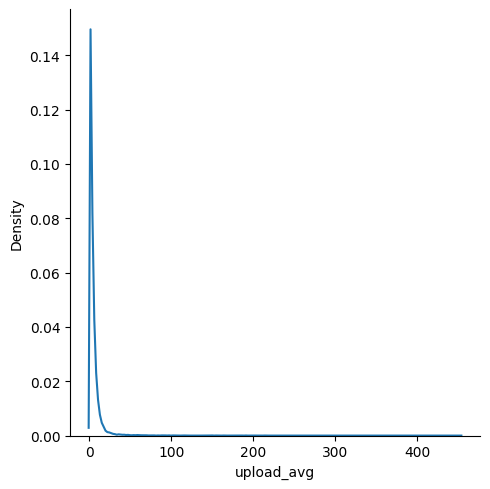

In [ ]:
sns.displot(data=df, x='upload_avg', kind="kde", bw_adjust=.25)

distplot shows that upload_avg is not normally distributed but is positively skewed

In conclusion, **no data should be deleted because all data can provide important information.**

### Handling Abnormal Data

In [ ]:
#check to see if there is subscription age below 0 or minus
df[df['subscription_age'] < 0]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
69320,1621523,0,0,-0.02,0,0.08,0,32.6,1.3,0,1


There is subscription age = -0,02 year or below 0 suggest that there an error. Subscription age represents the duration (in years) that a customer has been using the service, and it should be a non-negative number. So I would change the data with median value

In [ ]:
#calculate the median value from subs age that above 0 years
#then fill the minus value with median value

median_subs_age = df[df['subscription_age'] >= 0]['subscription_age'].median()
df['subscription_age'] = df['subscription_age'].apply(lambda x: median_subs_age if x < 0 else x)

In [ ]:
df[df['subscription_age'] < 0]

,id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,reamining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn


the abnormal data has been replaced

### Column Preprocessing

In [ ]:
#rename the column for better understanding
df = df.rename(columns={
    'id' : 'customer_id',
    'reamining_contract' : 'remaining_contract'
})

## Final Dataset

In [ ]:
#display the top row of final dataset
df.head(10)

,customer_id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,15,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,18,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,23,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,27,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,34,0,0,6.39,0,0.00,0,0.0,0.0,0,1
5,56,1,1,11.94,32,1.38,0,69.4,4.0,0,0
6,71,0,0,8.96,18,0.00,0,21.3,2.0,0,1
7,84,0,0,5.48,14,0.00,1,0.0,0.0,0,1
8,94,0,0,8.54,0,0.00,0,0.0,0.0,0,1
9,112,0,0,8.33,0,0.00,0,0.0,0.0,0,1


In [ ]:
#display the last row of the final dataset
df.tail()

,customer_id,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
72269,1689648,1,1,0.09,0,1.25,0,0.0,0.0,0,1
72270,1689676,1,0,0.06,1,1.63,0,0.8,0.0,0,1
72271,1689679,1,0,0.02,0,2.19,0,1.5,0.2,0,1
72272,1689733,0,0,0.01,0,0.72,0,0.0,0.0,0,1
72273,1689744,1,1,0.01,0,0.82,0,0.0,0.0,0,1


In [ ]:
#get the size of the final dataset
df.shape

(72274, 11)

the final dataset contain 72.274 rows and 11 columns



In [ ]:
#get list of columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72274 entries, 0 to 72273
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_id                  72274 non-null  int64  
 1   is_tv_subscriber             72274 non-null  int64  
 2   is_movie_package_subscriber  72274 non-null  int64  
 3   subscription_age             72274 non-null  float64
 4   bill_avg                     72274 non-null  int64  
 5   remaining_contract           72274 non-null  float64
 6   service_failure_count        72274 non-null  int64  
 7   download_avg                 72274 non-null  float64
 8   upload_avg                   72274 non-null  float64
 9   download_over_limit          72274 non-null  int64  
 10  churn                        72274 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 6.1 MB


the final dataset contains 11 columns, with 4 columns of float type, and 7 columns of integer type

## Deep Dive EDA

### How Many Customer Churn?

In [ ]:
#get the count of values of the dependent variable
churn_counts = df['churn'].value_counts()

churn_counts

,count
churn,
1,40050
0,32224


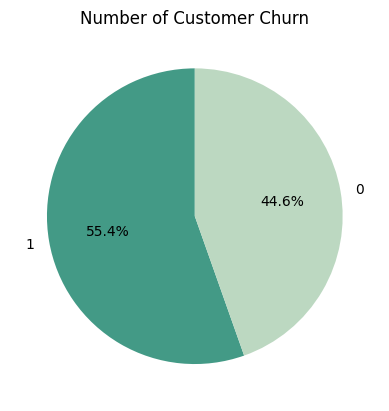

In [ ]:
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#439a86', '#bcd8c1'])
plt.title('Number of Customer Churn')
plt.show()

There are more than 50% of customers who have churned, which is around 40,050 people. Therefore, we can conclude that the majority of customers have already cancelled the service.

In [ ]:
#customers who cancelled the internet service
churn = df.loc[df['churn'] == 1]

#customers who did not cancel the internet service
not_churn = df.loc[df['churn'] == 0]

### How the distribution of the subscription age?

In [ ]:
#to know average of subscription age for churn customers
churn['subscription_age'].mean()

2.2266034956304614

In [ ]:
#to know average of subscription age for non-churn customers
not_churn['subscription_age'].mean()

2.7278280163853026

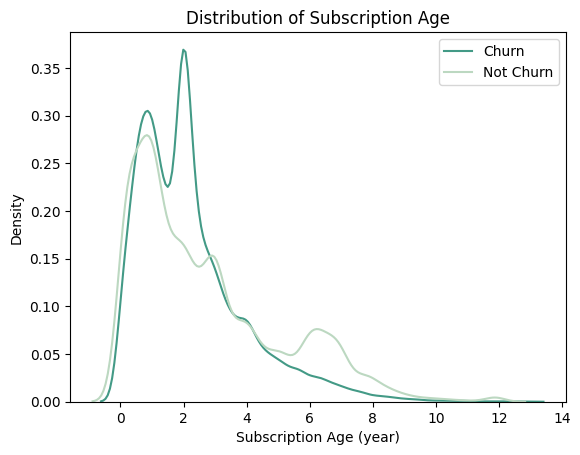

In [ ]:
#check subscription age distribution

sns.kdeplot(churn['subscription_age'], label='Churn', color='#439a86')
sns.kdeplot(not_churn['subscription_age'], label='Not Churn', color='#bcd8c1')
plt.title('Distribution of Subscription Age')
plt.xlabel('Subscription Age (year)')
plt.legend()
plt.show()

* Both churned and non-churned customers show similar patterns. For example, in the 0-2 years range, both have a high concentration, but after 2 years, the numbers decrease, with churned customers decreasing more sharply.
* Churned customers usually have shorter subscription ages compared to non-churned customers. This suggest that most customers who cancelled the service do within the first few years of their subscription


#### at what point in their subscription are customers most likely to churn?

In [ ]:
#make a copy of the df so that it does not overlap with the original df
df_copy = df.copy()

#convert the 'subscription_age' from years to months
df_copy['subscription_age_months'] = df_copy['subscription_age'] * 12

#create subscription age range to df_copy but only for below 24 months
#bcs from the kde plot, after 36 months the number of customers continues to decrease
df_copy['Subscription Age Range'] = pd.cut(
    df_copy['subscription_age_months'],
    bins=[0, 3, 6, 9, 12, 15, 18, 21, 24],
    labels=['0-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-21', '22-24'],
    right=True
)

#filter out null values (those above 36 months)
df_filtered = df_copy.dropna(subset=['Subscription Age Range'])

#filter for churned customer only
churn_cust_filtered = df_filtered[df_filtered['churn'] == 1]

#group by subs age range and count the number of churned customers
churn_cust_subs = churn_cust_filtered.groupby('Subscription Age Range').size().reset_index(name='Count')

churn_cust_subs

<ipython-input-38-0d7f453c3c5e>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_cust_subs = churn_cust_filtered.groupby('Subscription Age Range').size().reset_index(name='Count')


,Subscription Age Range,Count
0,0-3,1812
1,4-6,2279
2,7-9,3070
3,10-12,3202
4,13-15,2748
5,16-18,2253
6,19-21,2015
7,22-24,4120


In [ ]:
#custom palette with shades of green and grey for churned customers
custom_palette = ['#d8f3dc', '#b7e4c7', '#95d5b2', '#99e2b4', '#74c69d', '#52b788', '#40916c', '#2d6a4f', '#1b4332', '#081c15']

<ipython-input-40-b563cfa6f5de>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=churn_cust_subs, x='Subscription Age Range', y='Count', palette=custom_palette)
<ipython-input-40-b563cfa6f5de>:2: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.barplot(data=churn_cust_subs, x='Subscription Age Range', y='Count', palette=custom_palette)


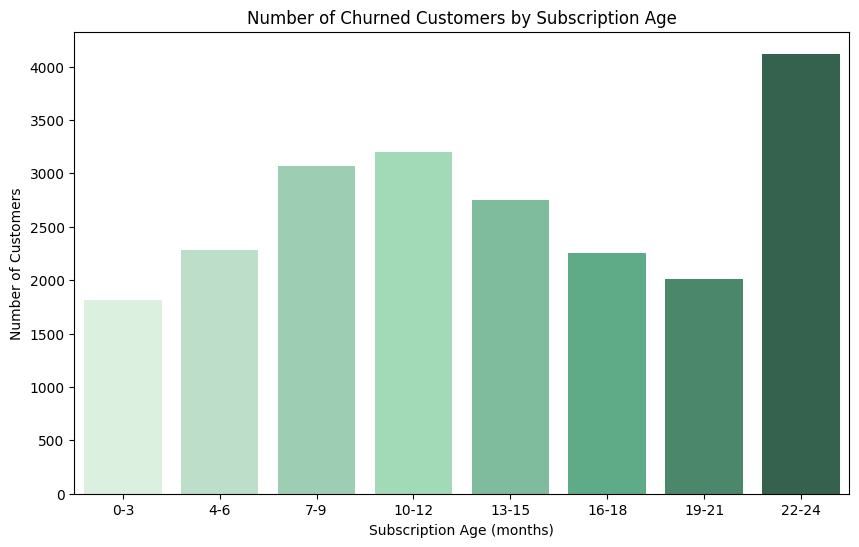

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_cust_subs, x='Subscription Age Range', y='Count', palette=custom_palette)
plt.title('Number of Churned Customers by Subscription Age')
plt.xlabel('Subscription Age (months)')
plt.ylabel('Number of Customers')
plt.show()

Many customers decide to cancelled the service at the 22-24 month subscription age.

### How the distribution of service failure?

In [ ]:
#to know average of service failure that happened for churn customers
churn['service_failure_count'].mean()

0.2900374531835206

In [ ]:
#to know average of service failure that happened for churn customers
not_churn['service_failure_count'].mean()

0.25459285004965243

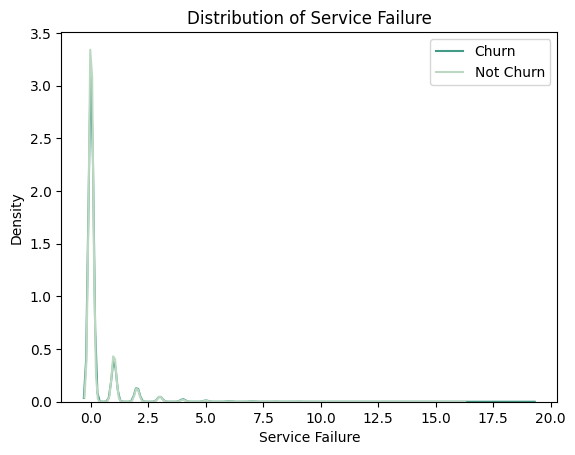

In [ ]:
#check average service failure distribution

sns.kdeplot(churn['service_failure_count'], label='Churn', color='#439a86')
sns.kdeplot(not_churn['service_failure_count'], label='Not Churn', color='#bcd8c1')
plt.title('Distribution of Service Failure')
plt.xlabel('Service Failure')
plt.legend()
plt.show()

Churned customers are more likely to experience service failure than non-churned customers.

#### For customers who churned within 24 months, how many service failures did they experience?

In [ ]:
#group by subscription age range and sum the number of service failures
service_failures_by_age_range = churn_cust_filtered.groupby('Subscription Age Range')['service_failure_count'].sum().reset_index()

service_failures_by_age_range

<ipython-input-44-e3131648fd0d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  service_failures_by_age_range = churn_cust_filtered.groupby('Subscription Age Range')['service_failure_count'].sum().reset_index()


,Subscription Age Range,service_failure_count
0,0-3,386
1,4-6,971
2,7-9,1103
3,10-12,918
4,13-15,744
5,16-18,561
6,19-21,509
7,22-24,1034


<ipython-input-45-efff8c25de8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=service_failures_by_age_range, x='Subscription Age Range', y='service_failure_count', palette=custom_palette)
<ipython-input-45-efff8c25de8b>:2: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.barplot(data=service_failures_by_age_range, x='Subscription Age Range', y='service_failure_count', palette=custom_palette)


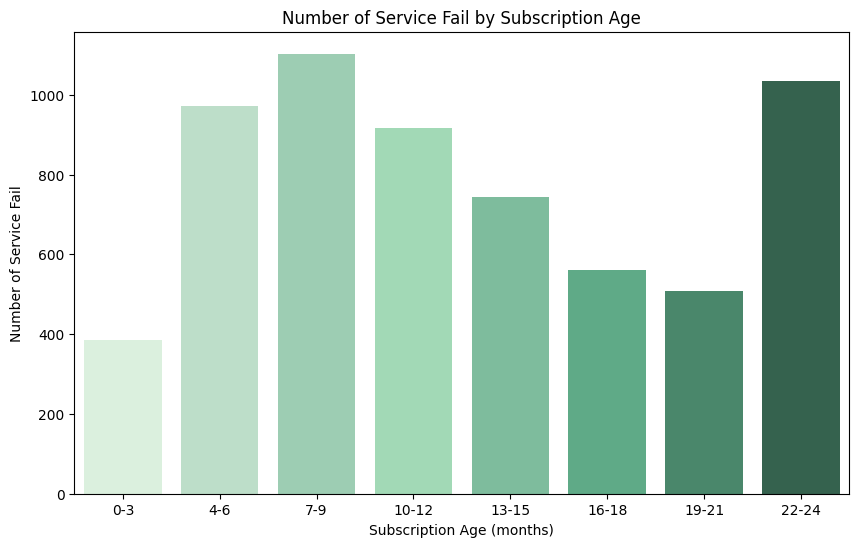

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=service_failures_by_age_range, x='Subscription Age Range', y='service_failure_count', palette=custom_palette)
plt.title('Number of Service Fail by Subscription Age')
plt.xlabel('Subscription Age (months)')
plt.ylabel('Number of Service Fail')
plt.show()

churned customers whose subscription age is around 22-24 months experience the 2nd most service failures

### How do churned and non-churned customers differ in their subscription package choices?

In [ ]:
#define conditions
conditions = [
    (df_copy['is_tv_subscriber'] == 0) & (df_copy['is_movie_package_subscriber'] == 0),
    (df_copy['is_tv_subscriber'] == 1) & (df_copy['is_movie_package_subscriber'] == 0),
    (df_copy['is_tv_subscriber'] == 0) & (df_copy['is_movie_package_subscriber'] == 1),
    (df_copy['is_tv_subscriber'] == 1) & (df_copy['is_movie_package_subscriber'] == 1)
]
choices = ['none', 'tv only', 'movie only', 'both']

#create new column called subscribe to know every customers subscribe to what
df_copy['subscribe'] = np.select(conditions, choices)

In [ ]:
print(df_copy['subscribe'].value_counts())

subscribe
tv only       34739
both          24183
none          13350
movie only        2
Name: count, dtype: int64


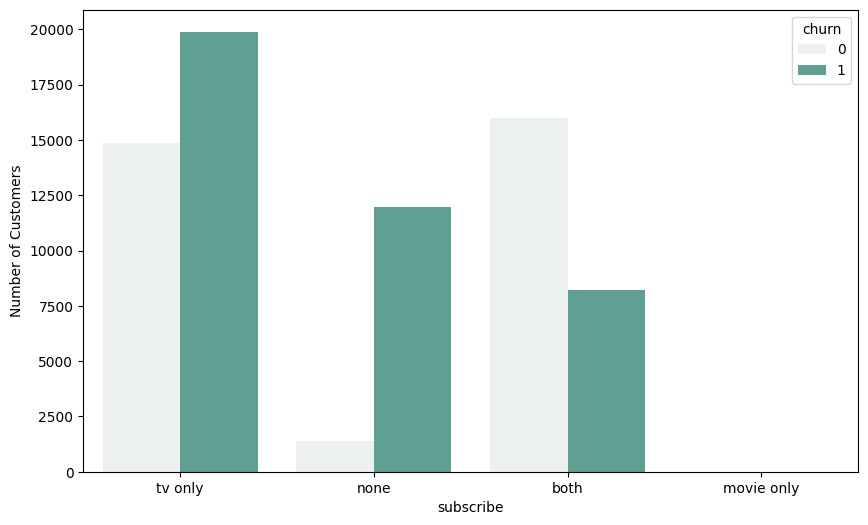

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='subscribe', hue='churn', data=df_copy, palette='light:#5A9')
plt.ylabel('Number of Customers')
plt.show()

Based on the graph, many of the customers who stopped using the service came from TV subscriptions.

### How the distribution of the bill average?

In [ ]:
#to know average of bill for churn customers
churn['bill_avg'].mean()

18.692858926342073

In [ ]:
#to know average of subscription age for non-churn customers
not_churn['bill_avg'].mean()

19.252730883813307

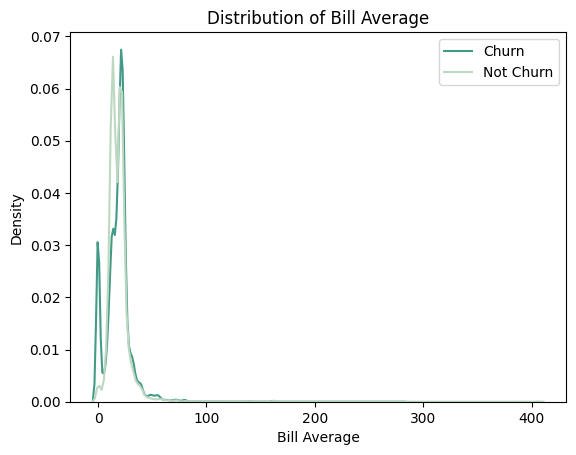

In [ ]:
#check bill average distribution

sns.kdeplot(churn['bill_avg'], label='Churn', color='#439a86')
sns.kdeplot(not_churn['bill_avg'], label='Not Churn', color='#bcd8c1')
plt.title('Distribution of Bill Average')
plt.xlabel('Bill Average')
plt.legend()
plt.show()

* Both churned and non-churned customers have similar patterns. Their average bill is under $50 and the higher the bill, the fewer the customers or decrease.

* Non-churned customers have a slightly higher average bill than churned customers.

#### Churned customers' average bill

In [ ]:
#create bill range to df_copy but only for below 100$
#bcs from the kde plot, the customer mostly have the bill under 100$
df_copy['Bill Range'] = pd.cut(
    df_copy['bill_avg'],
    [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'],
    right=True
)

#filter out nuul values (those above 100$)
df_filter = df_copy.dropna(subset=['Bill Range'])

#filter for churned customer only
churn_cust_filter = df_filter[df_filter['churn'] == 1]

#group by bill range and count the number of churned customers
churn_cust_bill = churn_cust_filter.groupby('Bill Range').size().reset_index(name='Count')

churn_cust_bill

<ipython-input-52-a6aa89227188>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_cust_bill = churn_cust_filter.groupby('Bill Range').size().reset_index(name='Count')


,Bill Range,Count
0,0-10,2861
1,11-20,14250
2,21-30,14781
3,31-40,2104
4,41-50,485
5,51-60,382
6,61-70,116
7,71-80,131
8,81-90,22
9,91-100,11


<ipython-input-53-d1e8571ecebc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= churn_cust_bill, x='Bill Range', y='Count', palette=custom_palette)


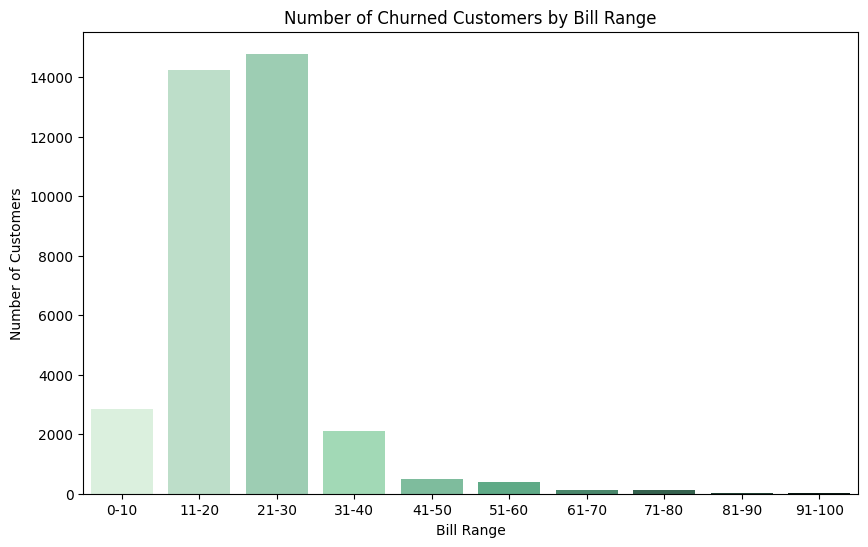

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data= churn_cust_bill, x='Bill Range', y='Count', palette=custom_palette)
plt.title('Number of Churned Customers by Bill Range')
plt.xlabel('Bill Range')
plt.ylabel('Number of Customers')
plt.show()

the majority of churned customers tend to have bills under $30

#### What’s the average TV bill for churned-customers?

In [ ]:
#filter the df for churned customers who subscribe to TV only
churned_tv_subs = df_copy[(df_copy['subscribe'] == 'tv only') & (df_copy['churn'] == 1)]

#group by the 'Bill Range' and calculate the total bill for each range
churn_tv_subs_bill = churned_tv_subs.groupby('Bill Range')['customer_id'].count().reset_index()
churn_tv_subs_bill.columns = ['Bill Range', 'customer_id']

churn_tv_subs_bill

<ipython-input-54-b9f5bea23e9a>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_tv_subs_bill = churned_tv_subs.groupby('Bill Range')['customer_id'].count().reset_index()


,Bill Range,customer_id
0,0-10,1636
1,11-20,7503
2,21-30,7767
3,31-40,964
4,41-50,184
5,51-60,129
6,61-70,36
7,71-80,29
8,81-90,11
9,91-100,3


<ipython-input-55-fc72adebbe7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data= churn_tv_subs_bill, x='Bill Range', y='customer_id', palette=custom_palette)


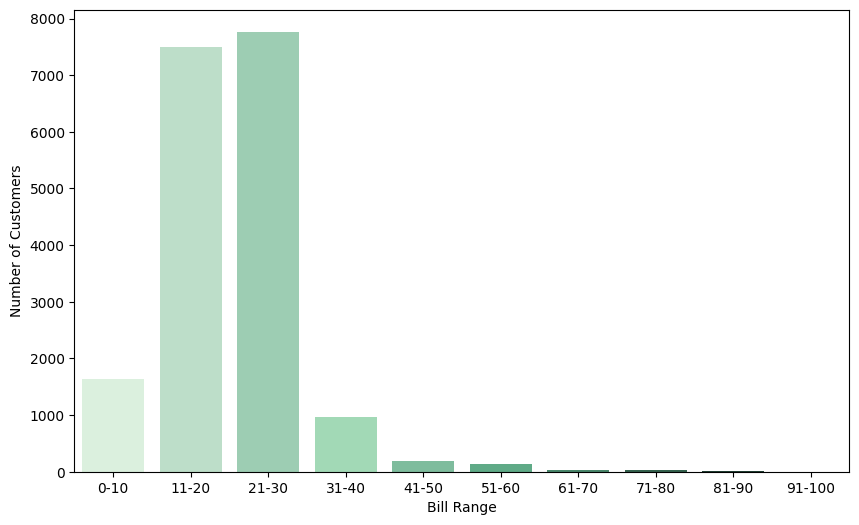

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data= churn_tv_subs_bill, x='Bill Range', y='customer_id', palette=custom_palette)
plt.xlabel('Bill Range')
plt.ylabel('Number of Customers')
plt.show()

most churned-customers who subscribe to TV pay a bill of around 21-30$

### How the distribution of the remaining contract?

In [ ]:
#to know average of remaining contract for churn customers
churn['remaining_contract'].mean()

0.09297553058676654

In [ ]:
#to know average of remaining contract for non-churn customers
not_churn['remaining_contract'].mean()

1.011077147467726

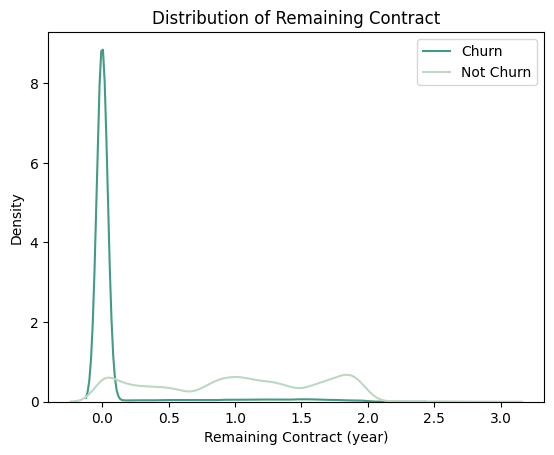

In [ ]:
#check remaining contract distribution

sns.kdeplot(churn['remaining_contract'], label='Churn', color='#439a86')
sns.kdeplot(not_churn['remaining_contract'], label='Not Churn', color='#bcd8c1')
plt.title('Distribution of Remaining Contract')
plt.xlabel('Remaining Contract (year)')
plt.legend()
plt.show()

There is a significant difference between churned and non-churned customers. Churned customers mostly does not have a contract while non-churned customers have a long remaining contract. because if they cancel while in contract they have to pay penalty. There are exceptions with customers who had contract but still churned


### How the distribution of the download data usage?

In [ ]:
#to know average of download data usage for churn customers
churn['download_avg'].mean()

26.83831210986267

In [ ]:
#to know average of download data usage for non-churn customers
not_churn['download_avg'].mean()

64.44625744786495

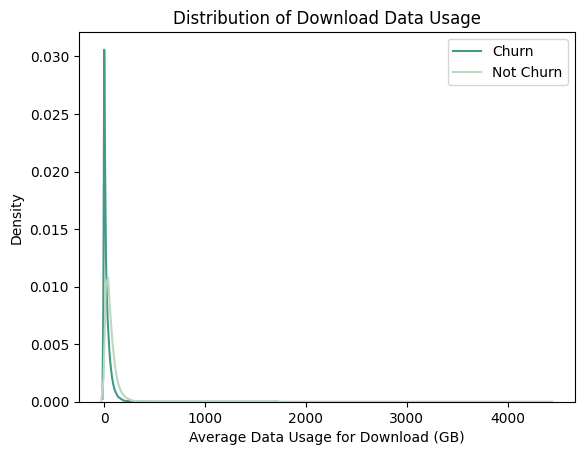

In [ ]:
#check average download data usage distribution

sns.kdeplot(churn['download_avg'], label='Churn', color='#439a86')
sns.kdeplot(not_churn['download_avg'], label='Not Churn', color='#bcd8c1')
plt.title('Distribution of Download Data Usage')
plt.xlabel('Average Data Usage for Download (GB)')
plt.legend()
plt.show()

Non-churned customers have higher data usage for downloads than churned customers. This suggests that non-churned customers have a greater need for internet service.

### How the distribution of the upload data usage?

In [ ]:
#to know average of upload data usage for churn customers
churn['upload_avg'].mean()

2.767697877652934

In [ ]:
#to know average of upload data usage for non-churn customers
not_churn['upload_avg'].mean()

5.937645854021848

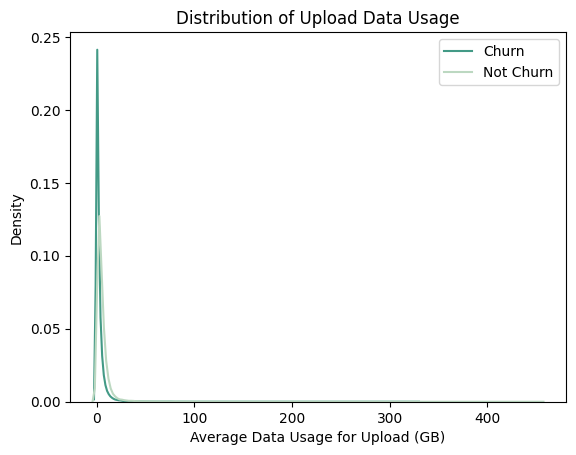

In [ ]:
#check average upload data usage distribution

sns.kdeplot(churn['upload_avg'], label='Churn', color='#439a86')
sns.kdeplot(not_churn['upload_avg'], label='Not Churn', color='#bcd8c1')
plt.title('Distribution of Upload Data Usage')
plt.xlabel('Average Data Usage for Upload (GB)')
plt.legend()
plt.show()

Non-churned customers have higher data usage for uploads than churned customers. This suggests that non-churned customers have a greater need for internet service.

## Correlation Matrix

Text(0.5, 1.0, 'Correlation Matrix')

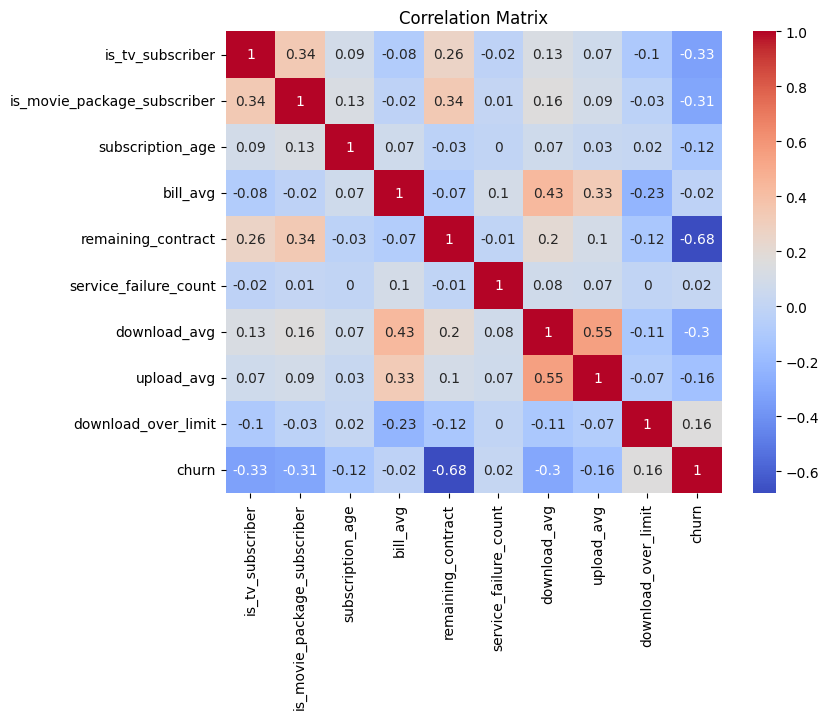

In [ ]:
df_corr = df.drop(['customer_id'], axis=1)
plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(method='pearson'). round(2), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix', fontsize= 12)

From the correlation matrix, can be concluded that no two numerical variables are highly correlated

In [ ]:
#isolate the categorical variables
categorical_var = [col for col in df.columns if df[col].nunique() <= 19 and col not in 'churn']
categorical_var

['is_tv_subscriber',
 'is_movie_package_subscriber',
 'service_failure_count',
 'download_over_limit']

In [ ]:
#isolate the numerical variables
numerical_var = [col for col in df.columns if df[col].dtype != "object"
                                          and df[col].nunique() > 19
                                          and col not in 'customer_id']
numerical_var

['subscription_age',
 'bill_avg',
 'remaining_contract',
 'download_avg',
 'upload_avg']

In [ ]:
#drop column that do not affect the dependent variable
df_prepared = df.drop(['customer_id'], axis=1)
df_prepared.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,11.95,25,0.14,0,8.4,2.3,0,0
1,0,0,8.22,0,0.00,0,0.0,0.0,0,1
2,1,0,8.91,16,0.00,0,13.7,0.9,0,1
3,0,0,6.87,21,0.00,1,0.0,0.0,0,1
4,0,0,6.39,0,0.00,0,0.0,0.0,0,1


##Feature Engineering

In [ ]:
#scale numerical variables using RobustScaler since it handles outliers better

mmscaler = RobustScaler()
df_prepared[numerical_var] = mmscaler.fit_transform(df_prepared[numerical_var])
df_prepared.head()

,is_tv_subscriber,is_movie_package_subscriber,subscription_age,bill_avg,remaining_contract,service_failure_count,download_avg,upload_avg,download_over_limit,churn
0,1,0,4.206751,0.666667,0.134615,0,-0.363296,0.046512,0,0
1,0,0,2.632911,-2.111111,0.000000,0,-0.520599,-0.488372,0,1
2,1,0,2.924051,-0.333333,0.000000,0,-0.264045,-0.279070,0,1
3,0,0,2.063291,0.222222,0.000000,1,-0.520599,-0.488372,0,1
4,0,0,1.860759,-2.111111,0.000000,0,-0.520599,-0.488372,0,1


the data has been made into a normal distribution

## Modelling

In [ ]:
#train-test split
X = df_prepared.drop('churn', axis=1)
y = df_prepared['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

###Logistic Regression

In [ ]:
#train the model

model = LogisticRegression()
model.fit(X_train, y_train)

#make the prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
#evaluating the model with performance metrics (train data)

lg_acc_train = accuracy_score(y_train, y_pred_train)
lg_pre_train = precision_score(y_train, y_pred_train)
lg_re_train = recall_score(y_train, y_pred_train)
lg_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (lg_acc_train * 100.0)), ("%.2f" % (lg_pre_train * 100.0)),
               ("%.2f" % (lg_re_train * 100.0)), ("%.2f" % (lg_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,87.18
1,Precision,85.96
2,Recall,91.84
3,F1,88.80


In [ ]:
#evaluating the model with performance metrics (test data)

lg_acc_test = accuracy_score(y_test, y_pred_test)
lg_pre_test = precision_score(y_test, y_pred_test)
lg_re_test = recall_score(y_test, y_pred_test)
lg_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (lg_acc_test * 100.0)), ("%.2f" % (lg_pre_test * 100.0)),
               ("%.2f" % (lg_re_test * 100.0)), ("%.2f" % (lg_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,86.97
1,Precision,86.06
2,Recall,91.40
3,F1,88.65


In [ ]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7358
True Negative :  5213
False Positive:  692
False Negative:  1192


###Decision Tree

In [ ]:
#train the model

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

#make the prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
#evaluating the model with performance metrics (train data)

dt_acc_train = accuracy_score(y_train, y_pred_train)
dt_pre_train = precision_score(y_train, y_pred_train)
dt_re_train = recall_score(y_train, y_pred_train)
dt_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (dt_acc_train * 100.0)), ("%.2f" % (dt_pre_train * 100.0)),
               ("%.2f" % (dt_re_train * 100.0)), ("%.2f" % (dt_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,100.00
1,Precision,100.00
2,Recall,100.00
3,F1,100.00


In [ ]:
#evaluating the model with performance metrics (test data)

dt_acc_test = accuracy_score(y_test, y_pred_test)
dt_pre_test = precision_score(y_test, y_pred_test)
dt_re_test = recall_score(y_test, y_pred_test)
dt_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (dt_acc_test * 100.0)), ("%.2f" % (dt_pre_test * 100.0)),
               ("%.2f" % (dt_re_test * 100.0)), ("%.2f" % (dt_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,90.94
1,Precision,92.25
2,Recall,91.40
3,F1,91.83


In [ ]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7358
True Negative :  5787
False Positive:  692
False Negative:  618


### Random Forest

In [ ]:
#train the model

model = RandomForestClassifier()
model.fit(X_train, y_train)

#make the prediction
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
#evaluating the model with performance metrics (train data)

rf_acc_train = accuracy_score(y_train, y_pred_train)
rf_pre_train = precision_score(y_train, y_pred_train)
rf_re_train = recall_score(y_train, y_pred_train)
rf_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (rf_acc_train * 100.0)), ("%.2f" % (rf_pre_train * 100.0)),
               ("%.2f" % (rf_re_train * 100.0)), ("%.2f" % (rf_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,100.00
1,Precision,100.00
2,Recall,100.00
3,F1,100.00


In [ ]:
#evaluating the model with performance metrics (test data)

rf_acc_test = accuracy_score(y_test, y_pred_test)
rf_pre_test = precision_score(y_test, y_pred_test)
rf_re_test = recall_score(y_test, y_pred_test)
rf_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (rf_acc_test * 100.0)), ("%.2f" % (rf_pre_test * 100.0)),
               ("%.2f" % (rf_re_test * 100.0)), ("%.2f" % (rf_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,94.39
1,Precision,96.04
2,Recall,93.79
3,F1,94.90


In [ ]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7550
True Negative :  6094
False Positive:  500
False Negative:  311


###LightGBM

In [ ]:
#build the lightgbm model

model = lgb.LGBMClassifier()
model.fit(X_train, y_train)

#predict the results
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

[LightGBM] [Info] Number of positive: 32000, number of negative: 25819
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010642 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1149
[LightGBM] [Info] Number of data points in the train set: 57819, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.553451 -> initscore=0.214625
[LightGBM] [Info] Start training from score 0.214625


In [ ]:
#evaluating the model with performance metrics (train data)

lgb_acc_train = accuracy_score(y_train, y_pred_train)
lgb_pre_train = precision_score(y_train, y_pred_train)
lgb_re_train = recall_score(y_train, y_pred_train)
lgb_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (lgb_acc_train * 100.0)), ("%.2f" % (lgb_pre_train * 100.0)),
               ("%.2f" % (lgb_re_train * 100.0)), ("%.2f" % (lgb_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,94.62
1,Precision,95.92
2,Recall,94.30
3,F1,95.10


In [ ]:
#evaluating the model with performance metrics (test data)

lgb_acc_test = accuracy_score(y_test, y_pred_test)
lgb_pre_test = precision_score(y_test, y_pred_test)
lgb_re_test = recall_score(y_test, y_pred_test)
lgb_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (lgb_acc_test * 100.0)), ("%.2f" % (lgb_pre_test * 100.0)),
               ("%.2f" % (lgb_re_test * 100.0)), ("%.2f" % (lgb_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,94.42
1,Precision,96.05
2,Recall,93.85
3,F1,94.94


In [ ]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7555
True Negative :  6094
False Positive:  495
False Negative:  311


### XGBoost

In [ ]:
#build the xgboost model

model = XGBClassifier()
model.fit(X_train, y_train)

#predict the results
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

In [ ]:
#evaluating the model with performance metrics (train data)

xgb_acc_train = accuracy_score(y_train, y_pred_train)
xgb_pre_train = precision_score(y_train, y_pred_train)
xgb_re_train = recall_score(y_train, y_pred_train)
xgb_f1_train = f1_score(y_train, y_pred_train)

metrics_train = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (xgb_acc_train * 100.0)), ("%.2f" % (xgb_pre_train * 100.0)),
               ("%.2f" % (xgb_re_train * 100.0)), ("%.2f" % (xgb_f1_train * 100.0))]
}

metrics_df_train = pd.DataFrame(metrics_train)
metrics_df_train

,Metrics,Values
0,Accuracy,95.40
1,Precision,96.37
2,Recall,95.28
3,F1,95.82


In [ ]:
#evaluating the model with performance metrics (test data)

xgb_acc_test = accuracy_score(y_test, y_pred_test)
xgb_pre_test = precision_score(y_test, y_pred_test)
xgb_re_test = recall_score(y_test, y_pred_test)
xgb_f1_test = f1_score(y_test, y_pred_test)

metrics_test = {
    'Metrics': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Values': [("%.2f" % (xgb_acc_test * 100.0)), ("%.2f" % (xgb_pre_test * 100.0)),
               ("%.2f" % (xgb_re_test * 100.0)), ("%.2f" % (xgb_f1_test * 100.0))]
}

metrics_df_test = pd.DataFrame(metrics_test)
metrics_df_test

,Metrics,Values
0,Accuracy,94.72
1,Precision,96.17
2,Recall,94.27
3,F1,95.21


In [ ]:
#evaluating the model with confusion matrix

cf = confusion_matrix(y_pred_test, y_test)

print("True Positive : ", cf[1, 1])
print("True Negative : ", cf[0, 0])
print("False Positive: ", cf[0, 1])
print("False Negative: ", cf[1, 0])

True Positive :  7589
True Negative :  6103
False Positive:  461
False Negative:  302


###Comparing Models

I will focus on the recall score because I want to prevent prediction errors, namely customers who churn but are classified as not churned.

In [ ]:
compare = pd.DataFrame(
    [
        ['Logistic Regression', lg_re_train * 100.0, lg_re_test * 100.0],
        ['Decision Tree', dt_re_train * 100.0, dt_re_test * 100.0],
        ['Random Forest', rf_re_train * 100.0, rf_re_test * 100.0],
        ['LightGBM', lgb_re_train * 100.0, lgb_re_test * 100.0],
        ['XGBoost', xgb_re_train * 100.0, xgb_re_test * 100.0]
    ],
    columns = ['model', 'recall_train', 'recall_test']
)

compare

,model,recall_train,recall_test
0,Logistic Regression,91.837500,91.403727
1,Decision Tree,100.000000,91.403727
2,Random Forest,100.000000,93.788820
3,LightGBM,94.296875,93.850932
4,XGBoost,95.281250,94.273292


**Good Fit Models**: Logistic Regression, LightGBM, XGBoost

**Overfitting Models**: Decision Tree, Random Forest


The decision tree and random forest have a perfect recall on the training data, but the recall drops significantly on the test data. This suggests that the model is overfitting the training data. Meanwhile for logistic regression, lightgbm and xgboost, the recall scores are very close between the training and test so that it can call a good fit